# Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

In [3]:
gas_turbine = pd.read_csv('/content/gas_turbines.csv')
gas_turbine

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


About DataSet
The Dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.
The explanations of sensor measurements and their brief statistics are given below.
Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

# EDA

In [4]:
gas_turbine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


No Null Values in Data

In [5]:
# Checking Duplicate values

gas_turbine[gas_turbine.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


No Duplicates in Data

In [6]:
# Describe

gas_turbine.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
# Correlate

gas_turbine.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


# Visualization

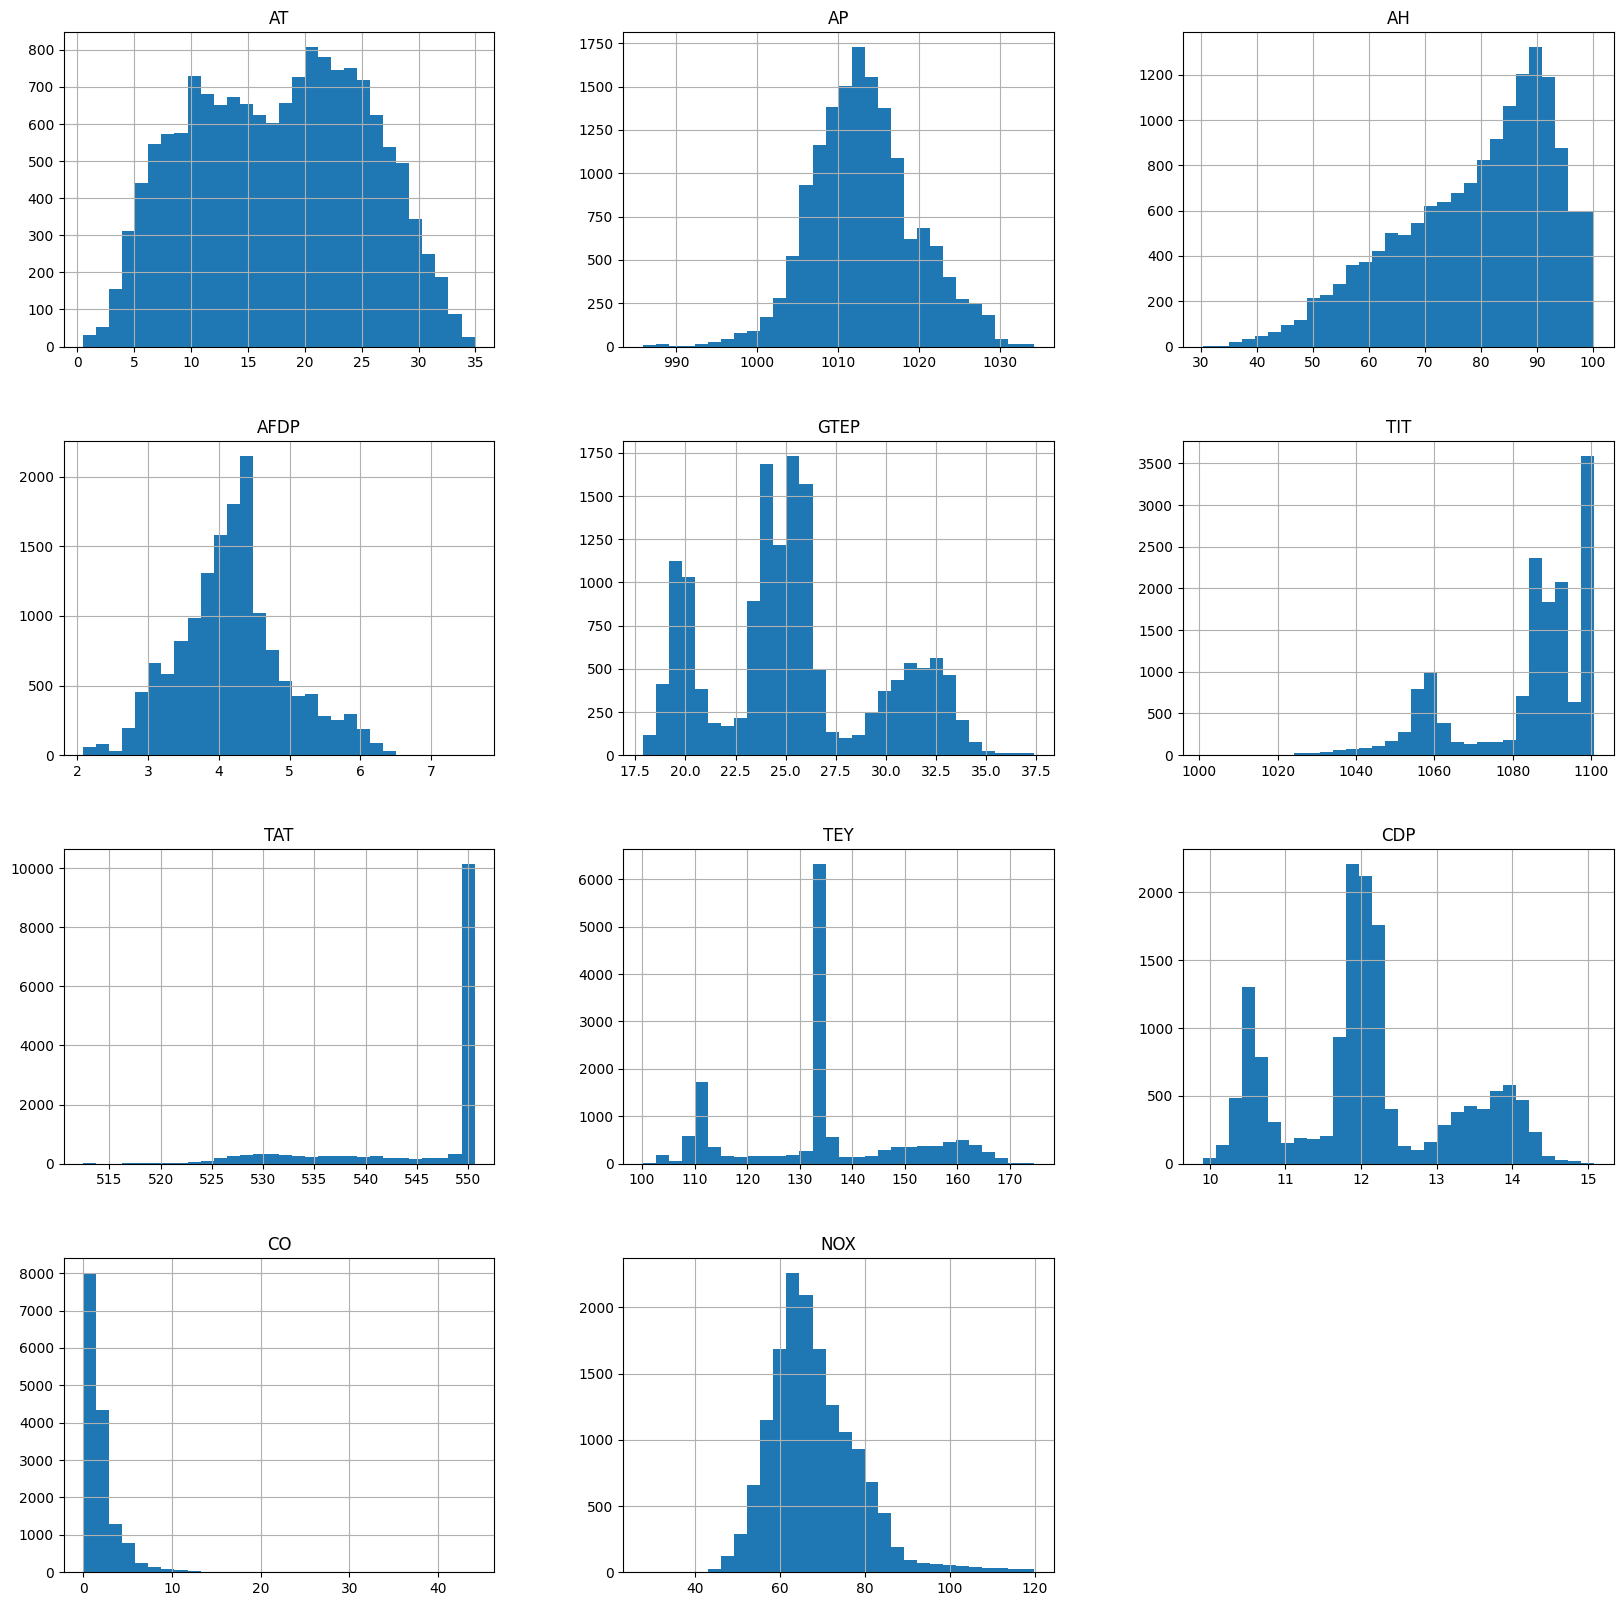

In [10]:
# create histogram for each variabel to check normality.
gas_turbine.hist(bins = 30, figsize= (20, 20) )
plt.show()

The dataset is clean and has no null values. From the "describe" function it can be seen that almost all variable holds a low SD, so the data is more concentrated to the mean. Not all the features are normally distributed, So I'll be going to normalize the data before training a model.

<Axes: >

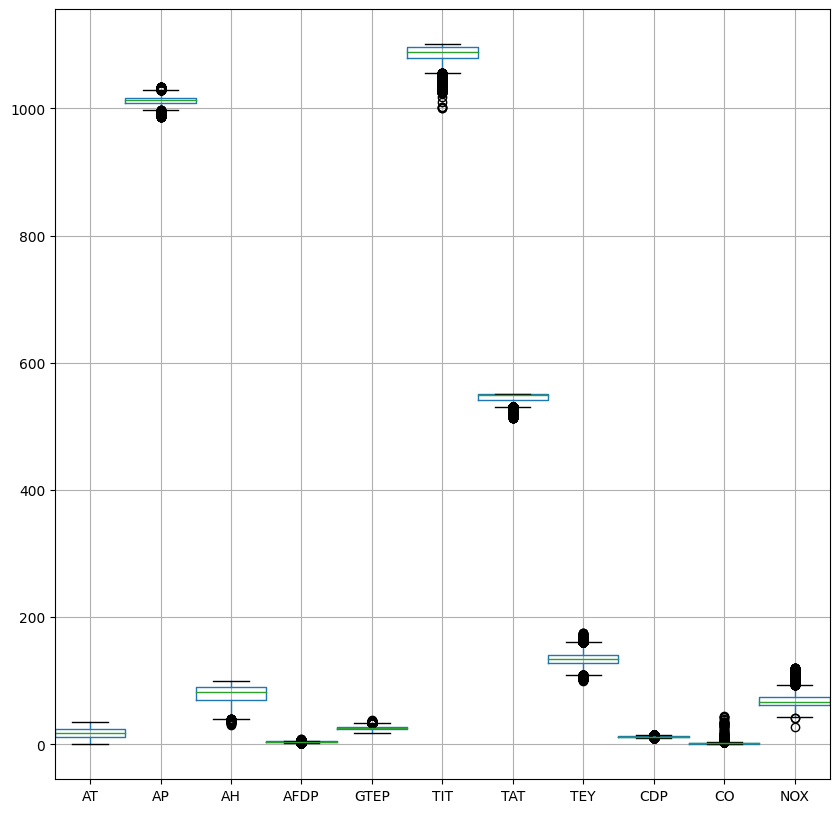

In [11]:
# Check the outliers

gas_turbine.boxplot(figsize = (10, 10), widths = 1)

The boxplot shows that more input variables are outliers, So I'll be using mean absolute error (MAE) to evaluate the model in modeling.  As MAE is not sensitive to the outliers

In [17]:
## Correlating data with HeatMap

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '500px'),
                        ('font-size', '12pt')])
]
corr = gas_turbine.corr()
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '480px', 'font-size': '9pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.00,-0.41,-0.55,-0.10,-0.05,0.09,0.34,-0.21,-0.10,-0.09,-0.60
AP,-0.41,1.00,0.04,0.04,0.08,0.03,-0.22,0.15,0.13,0.04,0.26
AH,-0.55,0.04,1.00,-0.12,-0.20,-0.25,0.01,-0.11,-0.18,0.17,0.14
AFDP,-0.10,0.04,-0.12,1.00,0.74,0.63,-0.57,0.72,0.73,-0.33,-0.04
GTEP,-0.05,0.08,-0.20,0.74,1.00,0.87,-0.76,0.98,0.99,-0.51,-0.21
TIT,0.09,0.03,-0.25,0.63,0.87,1.00,-0.36,0.89,0.89,-0.69,-0.23
TAT,0.34,-0.22,0.01,-0.57,-0.76,-0.36,1.00,-0.72,-0.74,0.06,0.01
TEY,-0.21,0.15,-0.11,0.72,0.98,0.89,-0.72,1.00,0.99,-0.54,-0.10
CDP,-0.10,0.13,-0.18,0.73,0.99,0.89,-0.74,0.99,1.00,-0.52,-0.17
CO,-0.09,0.04,0.17,-0.33,-0.51,-0.69,0.06,-0.54,-0.52,1.00,0.32


 bold textThe heatmap above shows the correlation between features and output variables(CO and NOx). It is easy to see that some features are negatively correlated with each other. For example, the correlation between TIT and CO is -0.69, and it means that when the Turbine Inlet Temperature (TIT) decreases, the gas-turbine engine will produce more CO because a low TIT reduces the efficiency of the gas-turbine engine.

# Model Building

In [20]:
# selecting NOX as target variabel

 # drop the target variable CO
nox_df = gas_turbine.copy()
nox_df = nox_df.drop("CO", axis = 1)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [22]:
X = nox_df.iloc[:, 0:-1]
y = nox_df["NOX"]

In [23]:
# normalize the X and y.

X = nox_df = Normalizer().fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2,random_state= 0, shuffle = True)

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression ()
linear_model.fit(X_train, y_train)

LinearRegression()

In [26]:
from sklearn.metrics import mean_absolute_error


y_pred = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred)
print("MAE on testset is:", round(mae_linear, 3))

MAE on testset is: 4.983


# Random Forest

In [27]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

In [28]:
model = RandomForestRegressor( )


In [29]:
# evaluate the model

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

In [32]:
# report performance
print('MAE on cross validation set : %.3f (%.3f)' % (abs(mean(n_scores)), std(n_scores)))

MAE on cross validation set : 2.229 (0.083)


In [33]:
# fit the model
model = RandomForestRegressor(random_state =0)
model = model.fit(X_train, y_train)

 MAE on test set again


In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("MAE on test set:", round (mae, 3))

MAE on test set: 2.37


**Conclusion**

Looks like the Random forest works well on this dataset and is also better than the simple linear regression model. I just applied the random forest model with default parameters, and I'm amazed that a simple random forest model can fit the data so well.
